<a href="https://colab.research.google.com/github/mo-lanang/ADM-Case-03-Association-Rule/blob/main/Case_Study_03_Kelompok_C_Association_Rule_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Case Study 3 Association Rule Kelompok 3</h1>
</div>

**Anggota kelompok C:**


1. Vania Adisaputri - 1906296362
2. Muhamad Ido - 1906354154
3. Hunaiva Kintan - 1906375695
4. Mohammad Lanang - 1906304263
5. Risfania Nurdinda Sari - 1906375820
6. Fadhilah Daffa Yoriko - 2006571116
7. Tesalonicca Talitha - 1906377826

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [39]:
### Import The Data ###

df = pd.read_csv('https://raw.githubusercontent.com/mo-lanang/ADM-Case-03-Association-Rule/main/Kasus-AR-MBA-Ganjil-2022.csv', sep=';')

df.info()
print('\n')
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID Transaksi  18 non-null     float64
 1   Tanggal       18 non-null     object 
 2   Konsumen      18 non-null     object 
 3   ID Produk     56 non-null     int64  
 4   Nama Produk   56 non-null     object 
 5   Merek         56 non-null     object 
 6   Jumlah        56 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.2+ KB




,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1.0,01/07/22 00.00,Mr. A,1,Roti,Sri Roti,2
1,NaN,NaN,NaN,2,Air Minum,Aquos,1
2,NaN,NaN,NaN,11,Mie Instan,Indomi,2
3,NaN,NaN,NaN,12,Mie Instan,Mi Sedap,1
4,2.0,01/07/22 00.00,Mr. B,2,Air Minum,Aquos,1


## 1. Data Cleaning

In [40]:
### Missing Values direplace dengan values sebelumnya ###

df.fillna(method='ffill', inplace=True)

df.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1.0,01/07/22 00.00,Mr. A,1,Roti,Sri Roti,2
1,1.0,01/07/22 00.00,Mr. A,2,Air Minum,Aquos,1
2,1.0,01/07/22 00.00,Mr. A,11,Mie Instan,Indomi,2
3,1.0,01/07/22 00.00,Mr. A,12,Mie Instan,Mi Sedap,1
4,2.0,01/07/22 00.00,Mr. B,2,Air Minum,Aquos,1


Karena dari hasil preview data pada blok kode sebelumnya terlihat terdapat missing values pada beberapa baris, sehingga kami memutuskan untuk mereplace missing values tersebut dengan data pada baris sebelumnya.

In [41]:
### Ganti kolom yang tipe datanya tidak sesuai ###

df['ID Transaksi'] = df['ID Transaksi'].astype('int64')
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%y %H.%M')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID Transaksi  56 non-null     int64         
 1   Tanggal       56 non-null     datetime64[ns]
 2   Konsumen      56 non-null     object        
 3   ID Produk     56 non-null     int64         
 4   Nama Produk   56 non-null     object        
 5   Merek         56 non-null     object        
 6   Jumlah        56 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 3.2+ KB


Terdapat beberapa kolom yang menurut kami memiliki tipe data yang tidak sesuai. Seperti data pada kolom "ID Transaksi" yang masih bertipe float kami ganti menjadi tipe integer, kemudian kolom "Tanggal" yang bertipe objek kami ganti menjadi pandas datetime.

In [42]:
### Gabungkan kolom "Nama Produk" dan "Merek" menjadi 1 kolom ###

df['Item'] = df['Nama Produk'].str.cat(df['Merek'], sep='-')

df.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah,Item
0,1,2022-07-01,Mr. A,1,Roti,Sri Roti,2,Roti-Sri Roti
1,1,2022-07-01,Mr. A,2,Air Minum,Aquos,1,Air Minum-Aquos
2,1,2022-07-01,Mr. A,11,Mie Instan,Indomi,2,Mie Instan-Indomi
3,1,2022-07-01,Mr. A,12,Mie Instan,Mi Sedap,1,Mie Instan-Mi Sedap
4,2,2022-07-01,Mr. B,2,Air Minum,Aquos,1,Air Minum-Aquos


Kami menggabungkan Kolom "Nama Produk" dengan Kolom "Merek" menjadi Kolom "Item" agar dapat digunakan dalam algoritma apriori di Python. Karena jikalau hanya menggunakan kolom "Nama Produk" dan "Merek" saja tidak akan mewakili semua item yang ada pada keseluruhan transaksi yang ada.

In [43]:
### Ganti tipe kolom "Item" menjadi "category" ###

df['Item'] = df['Item'].astype('category')
 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID Transaksi  56 non-null     int64         
 1   Tanggal       56 non-null     datetime64[ns]
 2   Konsumen      56 non-null     object        
 3   ID Produk     56 non-null     int64         
 4   Nama Produk   56 non-null     object        
 5   Merek         56 non-null     object        
 6   Jumlah        56 non-null     int64         
 7   Item          56 non-null     category      
dtypes: category(1), datetime64[ns](1), int64(3), object(3)
memory usage: 3.6+ KB


In [44]:
### Memindahkan Kolom "Jumlah" ke paling kanan ###

df = df.iloc[:,[0,1,2,3,4,5,7,6]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID Transaksi  56 non-null     int64         
 1   Tanggal       56 non-null     datetime64[ns]
 2   Konsumen      56 non-null     object        
 3   ID Produk     56 non-null     int64         
 4   Nama Produk   56 non-null     object        
 5   Merek         56 non-null     object        
 6   Item          56 non-null     category      
 7   Jumlah        56 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(3), object(3)
memory usage: 3.6+ KB


Data transaksi AlfaIndo yang diberikan pun telah selesai dibersihkan dan akan dilanjutkan dengan proses EDA serta Association Rules dengan menggunakan teknik Market Basket Analysis untuk mencari rekomendasi serta insights yang bisa kami berikan ke perusahaan.

## 2.EDA

In [45]:
df1 = df.groupby('Tanggal').aggregate({'Jumlah':np.sum})
df1.reset_index(inplace = True)
df1

,Tanggal,Jumlah
0,2022-07-01,11
1,2022-07-02,13
2,2022-07-03,7
3,2022-07-04,8
4,2022-07-05,14
5,2022-07-06,9
6,2022-07-07,9
7,2022-07-08,1
8,2022-08-02,2
9,2022-09-05,6


(array([738337., 738351., 738368., 738382., 738399., 738413., 738429.]),
 <a list of 7 Text major ticklabel objects>)

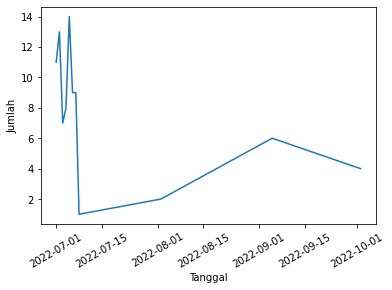

In [46]:
# Melihat Hasil Penjualanan Harian

sns.lineplot(x = 'Tanggal', y = 'Jumlah', data = df1)
plt.xticks(rotation=30)

Pada grafik, terlihat penjualanan produk harian. Terlihat bahwa pada 1 minggu pertama, terjadi tingkat penjualan produk yang paling tinggi. Namun setelah minggu 1, terjadi penurunan signifikan penjualan produk

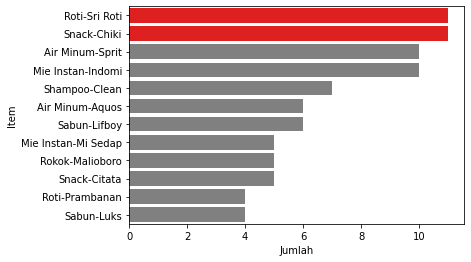

In [47]:
df2 = df.groupby('Item').aggregate({'Jumlah':np.sum})
df2.reset_index(inplace = True)
df2.sort_values('Jumlah',inplace=True)
color = ['grey' if (x>min(df2['Jumlah']))else 'red' for x in df2['Jumlah']]
sns.barplot(x='Jumlah', y = 'Item', data = df2, palette=color, order=df2.sort_values('Jumlah', ascending=False).Item)

Dari hasil barplot di atas, dapat terlihat bahwa item AlfaIndo yang mempunyai penjualan paling banyak adalah Roti-Sri Roti dan Snack-Chiki dengan masing-masing sebanyak 11 buah yang terjual selama periode Bulan Juli hingga Oktober 2022. Kemudian item yang mempunyai jumlah penjualan terkecil adalah Roti-Prambanan dan Sabun-Luks dengan masing-masing sebanyak 4 buah yang terjual selama periode Bulan Juli hingga Oktober 2022. 

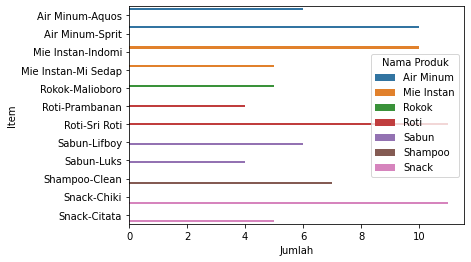

In [48]:
df3 = df.groupby(['Item','Nama Produk']).aggregate({'Jumlah':np.sum})
df3.reset_index(inplace = True)
df3.sort_values('Item')
sns.barplot(x='Jumlah', y = 'Item', hue='Nama Produk',data = df3)

Pada barplot diatas terlihat Merek apa yang lebih laku diantara produk tertentu, seperti produk Air minum paling laku terjual adalah merek Sprit, Mie instan yang paling laku terjual adalah merek Indomi, Jenis Roti yang paling laku terjual adalah merek Sri Roti, Jenis Sabun yang paling laku terjual adalah merek liftboy, dan jenis snack yang paling laku adalah merek Chiki. 

**Rekomendasi :**


1.   Kami dapat memberikan rekomendasi kepada Anda bahwa dapat dilakukan beberapa bentuk gerakan promo untuk meningkatkan penjualan item Roti-Prambanan dan Sabun-Luks pada periode ke depannya.
2.   Dapat diberikan diskon pada produk yang mereknya kurang laku, terkhusus pada produk yang terdapat timpang pada penjualannya seperti pada produk roti.

Oleh karena itu, kami akan melakukan analisis lebih lanjut menggunakan, metode Market Basket Analysis untuk menentukan cara efektif agar tingkat penjualan produk naik.





## 3. Association Rules

In [49]:
#Pertama, akan dibentuk pivot table untuk menampilkan transaksi setiap item.

basket = df.pivot_table(index='ID Transaksi', columns='Item', values='Jumlah', aggfunc='sum', fill_value=0)
basket.head()

Item,Air Minum-Aquos,Air Minum-Sprit,Mie Instan-Indomi,Mie Instan-Mi Sedap,Rokok-Malioboro,Roti-Prambanan,Roti-Sri Roti,Sabun-Lifboy,Sabun-Luks,Shampoo-Clean,Snack-Chiki,Snack-Citata
ID Transaksi,,,,,,,,,,,,
1,1,0,2,1,0,0,2,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,1,2,0
3,0,0,0,0,1,0,0,1,0,1,0,0
4,0,2,0,2,0,0,2,0,1,0,0,3
5,0,2,0,0,0,0,0,0,0,0,1,0


In [50]:
#one-hot encoding

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head()

Item,Air Minum-Aquos,Air Minum-Sprit,Mie Instan-Indomi,Mie Instan-Mi Sedap,Rokok-Malioboro,Roti-Prambanan,Roti-Sri Roti,Sabun-Lifboy,Sabun-Luks,Shampoo-Clean,Snack-Chiki,Snack-Citata
ID Transaksi,,,,,,,,,,,,
1,1,0,1,1,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,1,1,0
3,0,0,0,0,1,0,0,1,0,1,0,0
4,0,1,0,1,0,0,1,0,1,0,0,1
5,0,1,0,0,0,0,0,0,0,0,1,0


In [51]:
#Melihat support untuk tiap itemsets

frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
10,0.388889,(Snack-Chiki)
1,0.333333,(Air Minum-Sprit)
6,0.333333,(Roti-Sri Roti)
9,0.333333,(Shampoo-Clean)
0,0.277778,(Air Minum-Aquos)
...,...,...
71,0.055556,"(Roti-Sri Roti, Mie Instan-Mi Sedap, Air Minum..."
70,0.055556,"(Shampoo-Clean, Air Minum-Aquos, Snack-Chiki)"
18,0.055556,"(Shampoo-Clean, Air Minum-Aquos)"
20,0.055556,"(Mie Instan-Mi Sedap, Air Minum-Sprit)"


**Dari hasil diatas, dapat dilihat bahwa barang/item yang dominan dibeli merupakan barang yang termasuk dalam kebutuhan pokok seperti makanan (contohnya snack dengan merk Chiki, Air Minum Sprit dan Roti Sri Roti) dan kebutuhan rumah tangga (Contohnya Shampoo merk Clean)**

In [52]:
#Rules untuk tiap transaksi

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
918,"(Rokok-Malioboro, Air Minum-Aquos, Roti-Sri Roti)","(Mie Instan-Indomi, Snack-Chiki, Sabun-Lifboy)",0.055556,0.055556,0.055556,1.000000,18.0,0.052469,inf
680,"(Sabun-Luks, Air Minum-Sprit)","(Mie Instan-Mi Sedap, Snack-Citata)",0.055556,0.055556,0.055556,1.000000,18.0,0.052469,inf
923,"(Rokok-Malioboro, Sabun-Lifboy, Roti-Sri Roti)","(Air Minum-Aquos, Snack-Chiki, Mie Instan-Indomi)",0.055556,0.055556,0.055556,1.000000,18.0,0.052469,inf
564,"(Sabun-Luks, Roti-Sri Roti)","(Mie Instan-Mi Sedap, Snack-Citata)",0.055556,0.055556,0.055556,1.000000,18.0,0.052469,inf
921,"(Rokok-Malioboro, Snack-Chiki, Roti-Sri Roti)","(Air Minum-Aquos, Mie Instan-Indomi, Sabun-Lif...",0.055556,0.055556,0.055556,1.000000,18.0,0.052469,inf
...,...,...,...,...,...,...,...,...,...
778,(Shampoo-Clean),(Mie Instan-Mi Sedap),0.333333,0.166667,0.055556,0.166667,1.0,0.000000,1.0
779,(Mie Instan-Mi Sedap),(Shampoo-Clean),0.166667,0.333333,0.055556,0.333333,1.0,0.000000,1.0
806,"(Mie Instan-Indomi, Sabun-Lifboy)",(Roti-Sri Roti),0.166667,0.333333,0.055556,0.333333,1.0,0.000000,1.0
811,(Roti-Sri Roti),"(Mie Instan-Indomi, Sabun-Lifboy)",0.333333,0.166667,0.055556,0.166667,1.0,0.000000,1.0


In [53]:
#Dari hasil diatas, akan dipilih transaksi item yang lebih sering dilakukan dengan melakukan filtering
# Filtering

rules[ (rules['lift'] >= rules['lift'].quantile(0.75)) & (rules['confidence'] >= rules['confidence'].quantile(0.75)) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
918,"(Rokok-Malioboro, Air Minum-Aquos, Roti-Sri Roti)","(Mie Instan-Indomi, Snack-Chiki, Sabun-Lifboy)",0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
680,"(Sabun-Luks, Air Minum-Sprit)","(Mie Instan-Mi Sedap, Snack-Citata)",0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
923,"(Rokok-Malioboro, Sabun-Lifboy, Roti-Sri Roti)","(Air Minum-Aquos, Snack-Chiki, Mie Instan-Indomi)",0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
564,"(Sabun-Luks, Roti-Sri Roti)","(Mie Instan-Mi Sedap, Snack-Citata)",0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
921,"(Rokok-Malioboro, Snack-Chiki, Roti-Sri Roti)","(Air Minum-Aquos, Mie Instan-Indomi, Sabun-Lif...",0.055556,0.055556,0.055556,1.0,18.0,0.052469,inf
...,...,...,...,...,...,...,...,...,...
673,"(Sabun-Luks, Air Minum-Sprit, Snack-Citata)",(Mie Instan-Mi Sedap),0.055556,0.166667,0.055556,1.0,6.0,0.046296,inf
258,"(Mie Instan-Mi Sedap, Snack-Citata)",(Sabun-Luks),0.055556,0.166667,0.055556,1.0,6.0,0.046296,inf
674,"(Air Minum-Sprit, Mie Instan-Mi Sedap, Snack-C...",(Sabun-Luks),0.055556,0.166667,0.055556,1.0,6.0,0.046296,inf
274,"(Sabun-Luks, Roti-Sri Roti)",(Mie Instan-Mi Sedap),0.055556,0.166667,0.055556,1.0,6.0,0.046296,inf


**Dari hasil diatas, dapat dilihat nilai lift yang paling tinggi adalah 18 dimana nilai lift yang tinggi ini menggambarkan bahwa itemsets saling berhubungan. Confidence yang didapatkan juga bernilai 1, hal ini menggambarkan itemsets B akan dibeli apabila itemsets A sudah dibeli. Salah satu contoh transaksi dengan lift yang paling tinggi ada pada index 921. Dimana customer yang membeli Roti-Sri Roti, Rokok-Malioboro, Air Minum-Aquos juga membeli beberapa item makanan seperti Sabun-Lifboy, Snack-Chiki, Mie Instan-Indomi**


# Rekomendasi

**Beberapa rekomendasi yang dapat kami berikan adalah sebagai berikut:**

*   Perusahaan dapat menempatkan item makanan berdekatan dengan kebutuhan-kebutuhan rumah tangga dan kebutuhan tambahan lainnya.
*   Memastikan barang dengan jenis yang sama walaupun memiliki merk yang berbeda ditempatkan di satu tempat yang sama agar customer dapat memilih dari berbagai macam merk
*   Perusahaan dapat melakukan riset untuk mengetahui banyaknya jumlah pengunjung setiap hari. Dari data tersebut, perusahaan dapat melihat pola kunjungan. Dengan begitu, perusahaan dapat memberikan promo bundling, potongan harga atau pemberian voucher pada hari-hari yang memiliki jumlah pengunjung paling sedikit sehingga diharapkan dapat meningkatkan pendapatan dan jumlah pengunjung pada hari tersebut